## Using the Digits Dataset to understand the semi supervised Learning
- Digits DS Size : 1797 x 64
- As all are labelled data have to make then labelled
    - making 80% unlabelled : 1597
    - other 20% are labelled : 200
    - at last we compare the actual labelled and predicted labelled and find accuracy

In [36]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier

from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import accuracy_score

digits = load_digits()
X = digits.data
y = digits.target

In [37]:
rng = np.random.RandomState(42)  # random generator for reproducibility

n_total = len(y)                 # total samples (1797)
n_labeled = 200                # only 200 samples will remain labeled

indices = np.arange(n_total)     # create list [0,1,2,...,1796]
rng.shuffle(indices)             # shuffle indices randomly

labeled_idx = indices[:n_labeled]     # first 200 → labeled
unlabeled_idx = indices[n_labeled:]   # remaining → unlabeled

y_semi = np.copy(y)              # create editable label array
y_semi[unlabeled_idx] = -1       # set unlabeled data to -1 (indicates unknown label)

print("Initially Labeled Samples:", len(labeled_idx))
print("Initially Unlabeled Samples:", len(unlabeled_idx))

Initially Labeled Samples: 200
Initially Unlabeled Samples: 1597


In [38]:
# --------------------------------------------------------------
# STEP 4: Define Base Model + Self-Training Wrapper
# --------------------------------------------------------------
base_model = DecisionTreeClassifier()                # create decision tree as base learner
self_training_model = SelfTrainingClassifier(
    base_model,                                      # base model
    threshold=0.8,                                   # confidence threshold to assign label
    criterion='threshold'                            # labeling rule based on threshold
)
# --------------------------------------------------------------
# STEP 5: Train Model
# --------------------------------------------------------------
self_training_model.fit(X, y_semi)                   # train with partially labeled data

print("Training Completed!")

Training Completed!


In [39]:
# --------------------------------------------------------------
# STEP 6: Check How Many Pseudo-Labels Were Assigned
# --------------------------------------------------------------
# labeled_iter_ > 0 means labeled during training 
#Means kitne samples ko pseudo label assign hua unka sum (count)
pseudo_labels_count = np.sum(self_training_model.labeled_iter_ > 0)

print("Pseudo-Labels Assigned by Model:", pseudo_labels_count)

Pseudo-Labels Assigned by Model: 1597


In [40]:
# --------------------------------------------------------------
# STEP 7: Evaluate on Full Dataset (Just for Observation)
# --------------------------------------------------------------
y_pred = self_training_model.predict(X)              # predict labels for entire dataset
acc = accuracy_score(y, y_pred)                      # compute accuracy with true labels

print("Final Accuracy:", acc) # Without full supervision, model ne 75% samples sahi predict kiye

Final Accuracy: 0.7373400111296605



 Confusion Matrix (Raw Numbers)
[[157   1   0   0   0   1   6   0  10   3]
 [  1 123   7   7   3   4   3   3   2  29]
 [  0  12 111  17   0   3   9   0  23   2]
 [  0   2   4 141   1   6  14   0   1  14]
 [  4  18   0   0 148   1   2   7   1   0]
 [  5   7   0   5   5 136   3   2  13   6]
 [  2  18   0   0   3   1 156   0   1   0]
 [  1  20   1   5   2   3   0 133   5   9]
 [  1  25  10   9   0  17   7   6  85  14]
 [  0   1   0  14   0   3   9   6  12 135]]


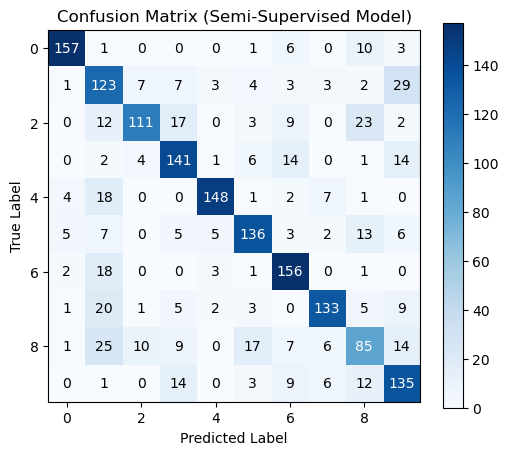

In [41]:
# --------------------------------------------------------------
# STEP X: CONFUSION MATRIX TO SEE WHICH LABELS GOT MISCLASSIFIED
# --------------------------------------------------------------

from sklearn.metrics import confusion_matrix            # import confusion matrix utility
import matplotlib.pyplot as plt                         # plotting library
import numpy as np                                      # numerical library

# Compute the confusion matrix using true vs predicted labels
cm = confusion_matrix(y, y_pred)                        # y = true labels, y_pred = model predictions

print("\n========================================")
print(" Confusion Matrix (Raw Numbers)")
print("========================================")
print(cm)                                               # print matrix to console for inspection

# --------------------------------------------------------------
# PLOTTING THE CONFUSION MATRIX AS HEATMAP
# --------------------------------------------------------------

plt.figure(figsize=(6, 5))                              # set figure size for better visibility
plt.imshow(cm, cmap='Blues')                            # render confusion matrix as heatmap
plt.colorbar()                                          # show color scale bar

plt.title("Confusion Matrix (Semi-Supervised Model)")   # set title for plot
plt.xlabel("Predicted Label")                           # set x-axis label
plt.ylabel("True Label")                                # set y-axis label

# Display numbers inside each cell
for i in range(cm.shape[0]):                            # loop over rows
    for j in range(cm.shape[1]):                        # loop over columns
        plt.text(j, i, cm[i, j],                        # position text inside cell
                 ha='center', va='center',              # center alignment
                 color='black' if cm[i, j] < cm.max()/2 else 'white')  
                 # choose text color based on background for visibility

plt.show()                                              # finally display the plot